In [120]:
import datetime
import json
import boto3
import io
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
#import seaborn as sns
plt.style.use('ggplot')

In [121]:
pickle_file = '../btc-autotrader/lib/data/log/2019-03-11T19:00:26.203575.pickle'

In [122]:
df = pd.read_pickle(pickle_file)

In [123]:
df['spread'] = df.ask_low - df.bid_high

In [124]:
df['spread_pct_change'] = df.spread.pct_change()

In [125]:
df.head()

,datetime,cash,cash_orig,btc_in_possession,btc_current_price,position,rate_of_change,total_value,acceleration,bid_high,ask_low,bought_price,sold_price,size,spread,spread_pct_change
0,2019-03-11 19:00:28.847073,41273.0,41273.0,0.016221,432585.0,BUYING,2.073932,0,0,432585.0,432788.0,0,0,0,203.0,NaN
0,2019-03-11 19:00:37.567093,41273.0,41273.0,0.016221,432586.0,BUYING,2.025631,0,-0.00553903,432598.0,432786.0,0,0,0,188.0,-0.073892
0,2019-03-11 19:00:47.596294,41273.0,41273.0,0.016221,432598.0,BUYING,1.995283,0,-0.00302603,432598.0,432785.0,0,0,0,187.0,-0.005319
0,2019-03-11 19:00:56.930327,41273.0,41273.0,0.016221,432800.0,BUYING,2.086126,0,0.00973245,432801.0,432815.0,0,0,0,14.0,-0.925134
0,2019-03-11 19:01:08.708141,41273.0,41273.0,0.016221,432800.0,BUYING,2.133747,0,0.00404331,432800.0,432815.0,0,0,0,15.0,0.071429


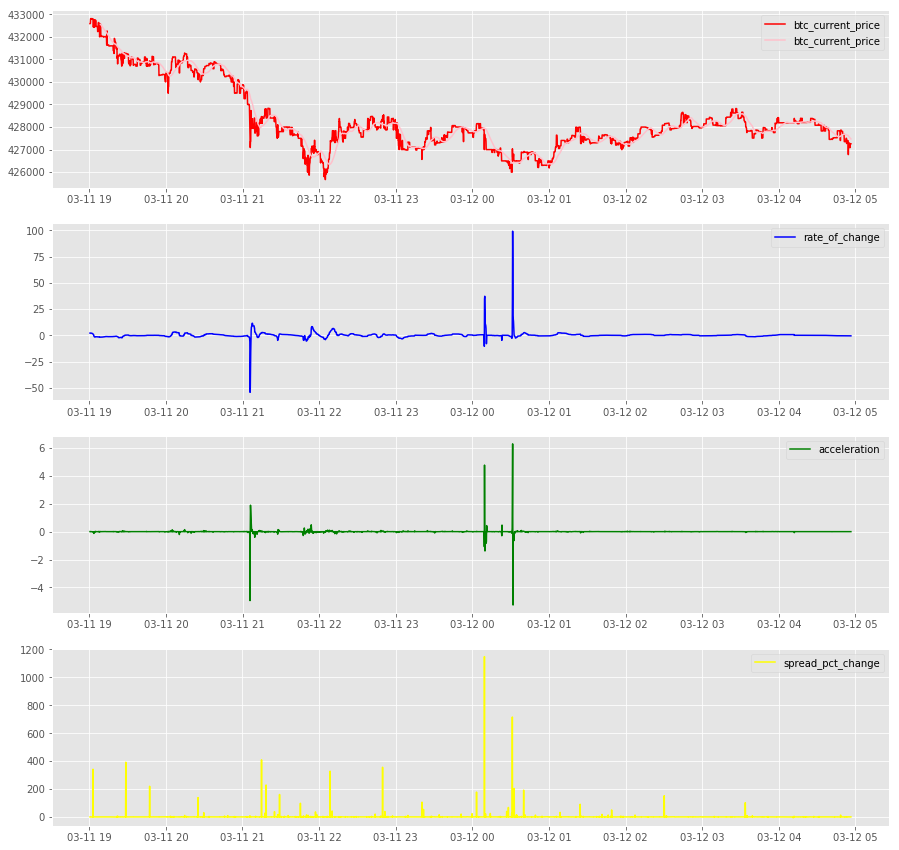

In [126]:
num = 4
fig, axes = plt.subplots(nrows=num, ncols=1, figsize=(15, 15), sharex=True)
plt.subplot(num,1,1)
plt.plot(df.datetime, df.btc_current_price, color='r')
plt.plot(df.datetime, df.btc_current_price.rolling(50).mean(), color='pink')
plt.legend()
#ax1.plot(df.datetime, df.ask_low, color='cyan', linestyle='--')
#ax1.plot(df.datetime, df.bid_high, color='magenta', linestyle='--')
#ax2.plot(df.datetime, df.spread, color='gray')
#ax1.scatter(df.datetime, df.bid_price, color='black')
plt.subplot(num,1,2)
plt.plot(df.datetime, df.rate_of_change, color='b')
plt.legend()
plt.subplot(num,1,3)
plt.plot(df.datetime, df.acceleration, color='g')
#plt.yscale('log')
plt.legend()
plt.subplot(num,1,4)
plt.plot(df.datetime, df.spread_pct_change, color='yellow')
plt.legend()
#plt.plot(df.datetime, df.spread_pct_change())
plt.show()

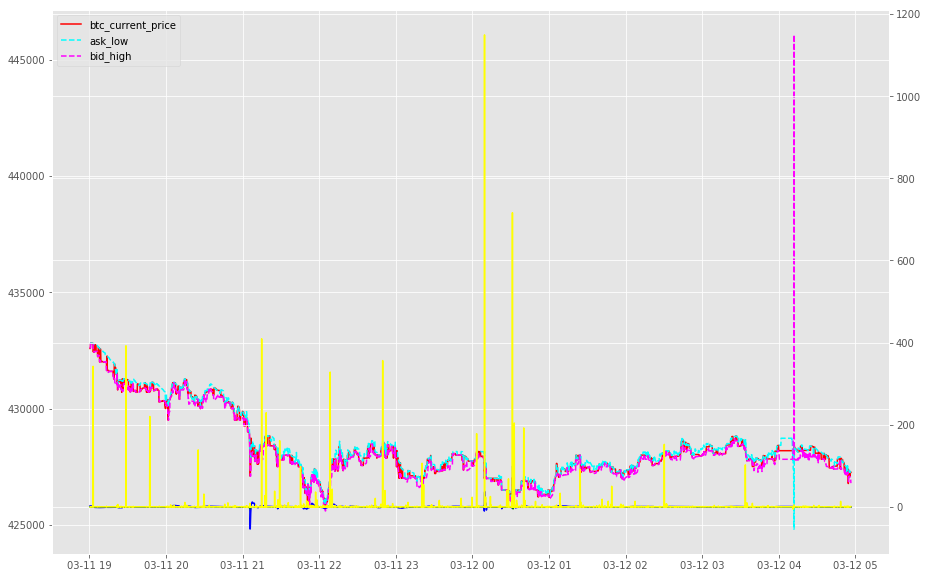

In [127]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.btc_current_price, color='r')
ax1.plot(df.datetime, df.ask_low, color='cyan', linestyle='--')
ax1.plot(df.datetime, df.bid_high, color='magenta', linestyle='--')
ax1.legend()
#ax2.plot(df.datetime, df.spread, color='gray')
#ax1.scatter(df.datetime, df.bid_price, color='black')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
ax2.plot(df.datetime, df.spread_pct_change, color='yellow')
#ax2.legend()
plt.show()

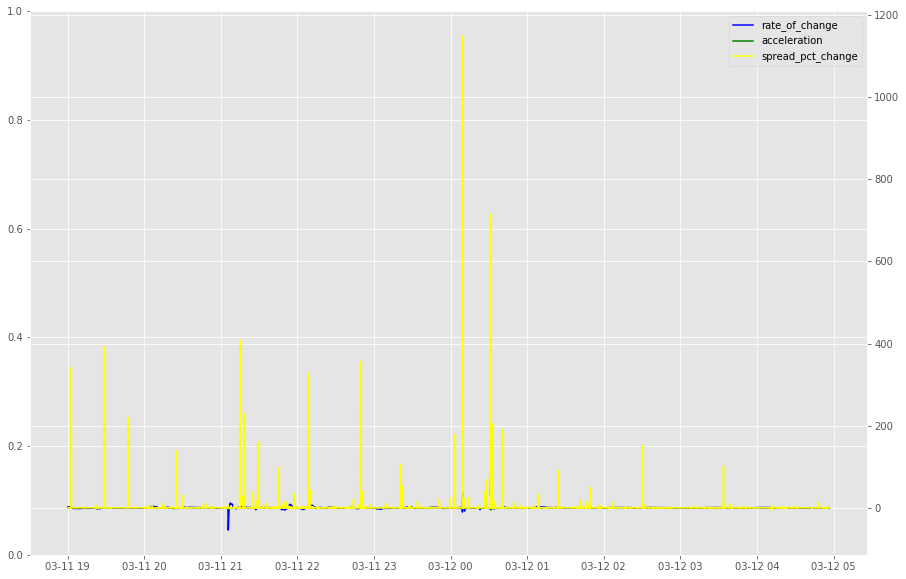

In [128]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#ax1.plot(df.datetime, df.btc_current_price, color='r')
#ax2.plot(df.datetime, df.spread, color='gray')
#ax1.scatter(df.datetime, df.bid_price, color='black')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
ax2.plot(df.datetime, df.spread_pct_change, color='yellow')
ax2.legend()
plt.show()

In [129]:
df.total_value.iloc[-1] - df.total_value.iloc[0]

0

No handles with labels found to put in legend.


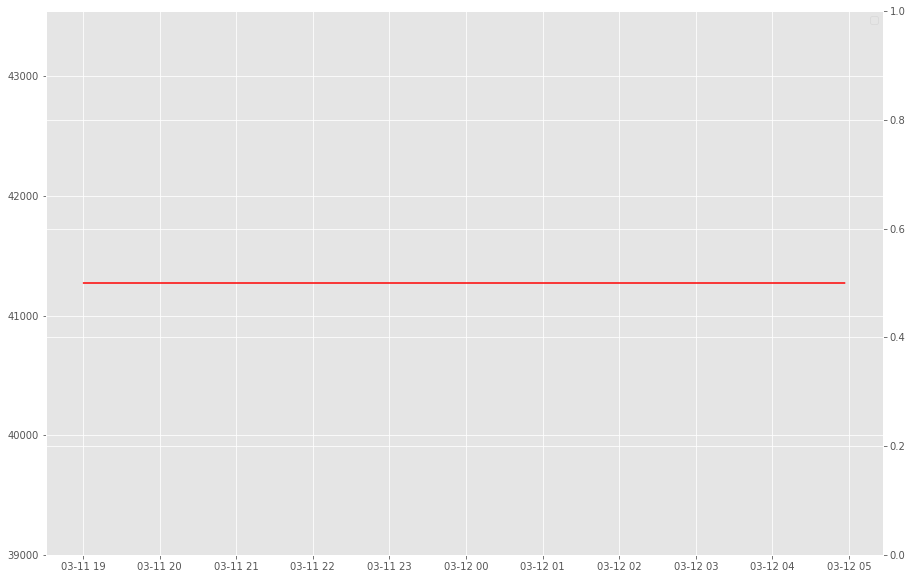

In [130]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.cash, color='r')
#ax2.plot(df.datetime, df.rate_of_change, color='b')
#ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()